# JH Coronavirus Analysis

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
%matplotlib inline

## Data

In [2]:
cases_csv = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deaths_csv = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

## Import data

### Cases

In [3]:
cases_df = pd.read_csv(cases_csv)
cases_df.drop(labels=['Lat','Long','Province/State'],axis=1,inplace=True)
cases_df = cases_df.groupby('Country/Region').sum()

# Transpose the data so that column names are countries and time is index
cases_df = pd.DataFrame(data=cases_df.values[:,1:].transpose(),
                              index=cases_df.columns[1:],
                              columns=cases_df.index.to_list())

# Convert time (string) to datetime
cases_df.index = pd.to_datetime(cases_df.index)

# View head of data
cases_df.head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,2,0,0,0,0,0


### Deaths

In [4]:
deaths_df = pd.read_csv(deaths_csv)
deaths_df.drop(labels=['Lat','Long'],axis=1,inplace=True)
deaths_df = deaths_df.groupby('Country/Region').sum()

# Transpose the data so that column names are countries and time is index
deaths_df = pd.DataFrame(data=deaths_df.values[:,1:].transpose(),
                              index=deaths_df.columns[1:],
                              columns=deaths_df.index.to_list())

# Convert time (string) to datetime
deaths_df.index = pd.to_datetime(deaths_df.index)

# View head of data
deaths_df.head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Analysis

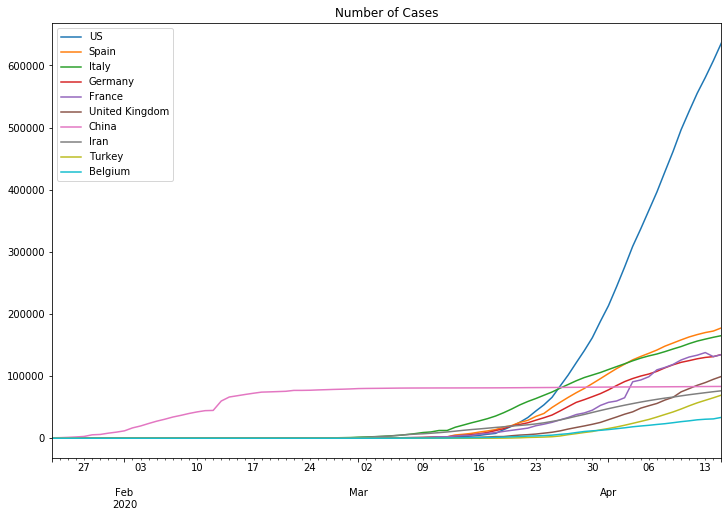

In [5]:
latest_date = max(cases_df.index)
latest_data = cases_df[cases_df.index==latest_date]
top_10_cases = latest_data.apply(pd.Series.nlargest,axis=1,n=10).columns
cases_df[top_10_cases].plot(figsize=(12,8),title='Number of Cases')

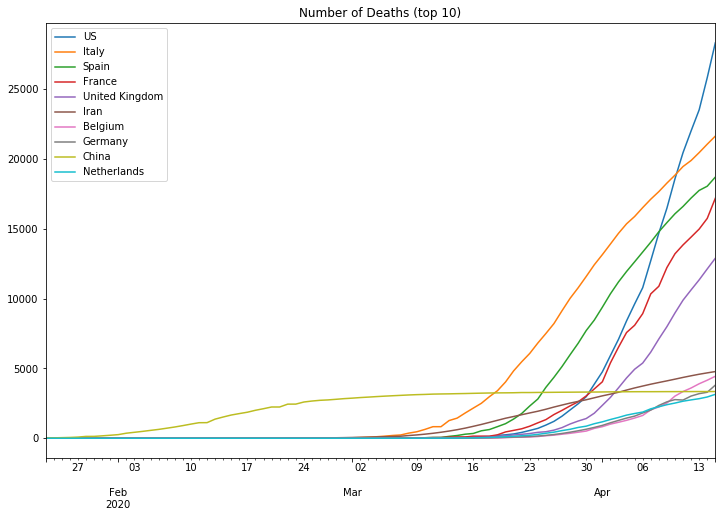

In [6]:
latest_data = deaths_df[deaths_df.index==latest_date]
top_10_deaths = latest_data.apply(pd.Series.nlargest,axis=1,n=10).columns
deaths_df[top_10_deaths].plot(figsize=(12,8),title='Number of Deaths (top 10)')

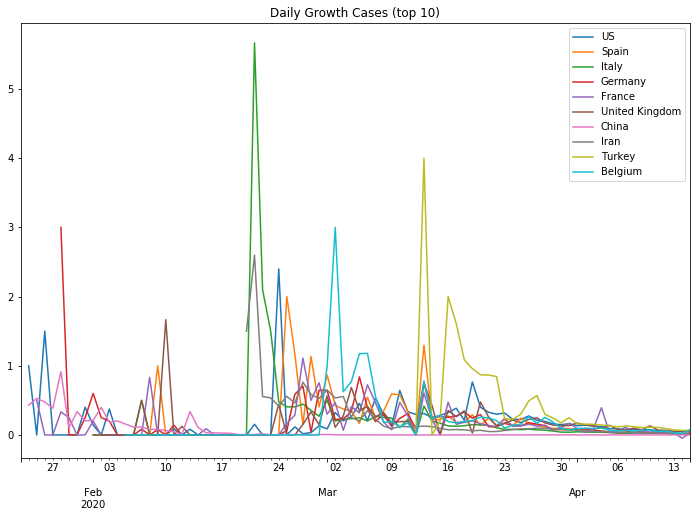

In [7]:
cases_df[top_10_cases].pct_change().plot(figsize=(12,8),title='Daily Growth Cases (top 10)')

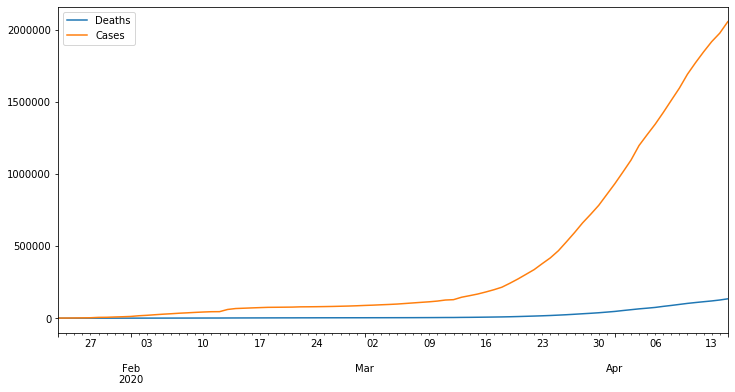

In [8]:
world_cases = cases_df.sum(axis=1)
world_deaths = deaths_df.sum(axis=1)
fig = plt.figure(figsize=(12,6))
world_deaths.plot()
world_cases.plot()
plt.legend(['Deaths','Cases'])

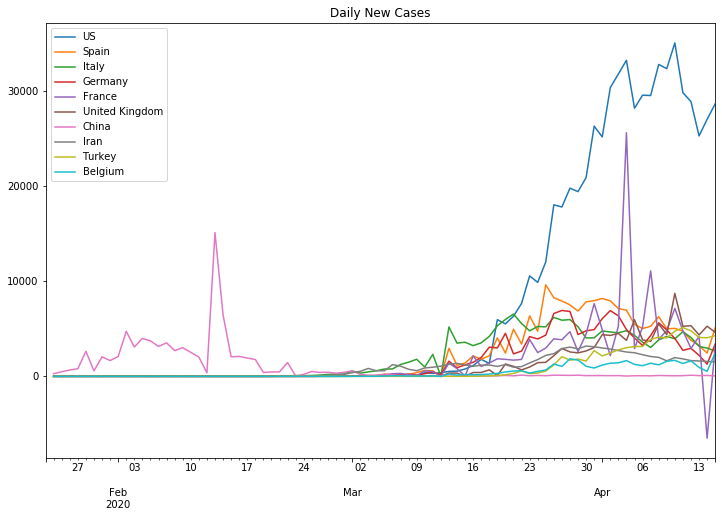

In [9]:
cases_df[top_10_cases].diff().plot(figsize=(12,8),title='Daily New Cases')